# 微积分

## 导数实验

定义  $u = f(x) = 3x^2 -4x$

In [1]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x**2 - 4 * x

In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


## 画图

> `#@save` 是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）

In [3]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [4]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，我们定义了 `plot` 函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or # X有ndim属性且其值为1
                isinstance(X, list) and not hasattr(X[0], "__len__")) # X为列表且其首个元素没有"__len__"属性

    if has_one_axis(X): # 如果是一个轴，将其列表化
        X = [X]
    if Y is None: # 如果没有传入Y参数，X为包含X长度个空列表的大列表，Y为X
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y): # 如果 Y 只有一个轴，将其列表化
        Y = [Y]
    if len(X) != len(Y): # 如果X的长度和Y的长度不一样，X改为Y长度数个X
        X = X * len(Y)
    axes.cla() # 清除axes
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

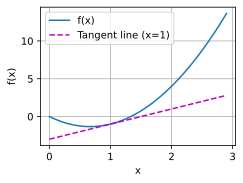

In [7]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 练习

绘制函数 $y = f(x) = x^3 - \frac{1}{x}$ 和其在 $x=0.4$ 处切线的图像。

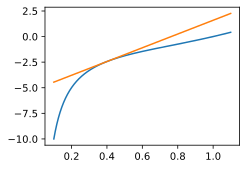

In [8]:
import matplotlib.pyplot as plt

def function(x):
    return x**3 - 1 / x

def tangent(function, x, point):
    y = function(point)
    h = 1e-3
    grad = (function(point + h) - function(point)) / h
    
    return (x - point) * grad + y

x = np.arange(0.1, 1.1, 0.001)
y = function(x)

tang = tangent(function, x=x, point=0.4)

plt.plot(x, y)
plt.plot(x, tang)
plt.show()